# Import Library

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Data and Explore

In [97]:
#importing the CSV here

df = pd.read_csv('../data/raw/AB_NYC_2019.csv',index_col=0)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

Observations:

We can see that our data has 48895  rows and 14 columns.

Our data has 9 numerical features, 5 categorical features and 1 datatime

Feature last_review and reviews_per_month has 10.050 null values from a total of 48895 rows,

# Explore Data

In [99]:
df.sample(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
9990200,Artist Escape With Private Terrace,4878363,Jessie,Brooklyn,Bedford-Stuyvesant,40.68624,-73.94349,Private room,25,1,7,2018-08-28,0.19,2,8
35431739,Cozy and nice apartment in Upper East Side,31043699,Nikki,Manhattan,Upper East Side,40.78037,-73.94657,Entire home/apt,120,5,1,2019-06-23,1.00,1,23
16813292,Stylish Private Room + Bath in the Heart of LES,1229568,Matt & Kathleen,Manhattan,Lower East Side,40.72190,-73.98717,Private room,174,2,100,2019-06-24,3.34,1,145
31835917,Chic and cozy,26317294,Denise,Manhattan,Upper West Side,40.77796,-73.98213,Private room,95,275,0,NaN,NaN,1,365
34420605,Great Apartment spacious quiet neighborhood 2BedR,178689185,Shem,Brooklyn,Prospect-Lefferts Gardens,40.66371,-73.94351,Entire home/apt,125,4,3,2019-05-27,1.64,1,145
4221999,Spacious & Bright: 1 BR Midtown!,20335235,Stephen,Manhattan,Midtown,40.75576,-73.96548,Entire home/apt,225,1,10,2018-08-22,0.18,1,0
24083746,Cozy private room available from January 1st,32434287,David,Manhattan,Harlem,40.81787,-73.94286,Private room,65,3,1,2018-05-08,0.07,1,0
8973292,Cozy Upper East Side two bedroom,1372837,Manoj,Manhattan,Upper East Side,40.77595,-73.94969,Entire home/apt,295,4,0,NaN,NaN,1,0
33444493,★Single Room in Backpackers Accommodation★,56060787,International,Brooklyn,Williamsburg,40.70908,-73.95663,Private room,55,1,14,2019-06-23,4.47,1,295


# Set Datatype

In [100]:
#set categorical data and datatime
df=df.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df['last_review'] = pd.to_datetime(df['last_review'], format="%Y/%m/%d")
df.dtypes


name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [101]:
round(df.describe(include=['category','datetime64'],datetime_is_numeric=True))

,neighbourhood_group,neighbourhood,room_type,last_review
count,48895,48895,48895,38843
unique,5,221,3,NaN
top,Manhattan,Williamsburg,Entire home/apt,NaN
freq,21661,3920,25409,NaN
mean,NaN,NaN,NaN,2018-10-04 01:47:23.910099456
min,NaN,NaN,NaN,2011-03-28 00:00:00
25%,NaN,NaN,NaN,2018-07-08 00:00:00
50%,NaN,NaN,NaN,2019-05-19 00:00:00
75%,NaN,NaN,NaN,2019-06-23 00:00:00
max,NaN,NaN,NaN,2019-07-08 00:00:00


In [102]:
#in this case 3 room_type
room_type=list(df['room_type'].unique())
room_type

['Private room', 'Entire home/apt', 'Shared room']

In [103]:
#in this case 5 neighbourhood_group
neighbourhood_group=list(df['neighbourhood_group'].unique())
neighbourhood_group

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [104]:
round(df.describe(include=['int64']))

,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.0,48895.0,48895.0,48895.0,48895.0,48895.0
mean,67620011.0,153.0,7.0,23.0,7.0,113.0
std,78610967.0,240.0,21.0,45.0,33.0,132.0
min,2438.0,0.0,1.0,0.0,1.0,0.0
25%,7822033.0,69.0,1.0,1.0,1.0,0.0
50%,30793816.0,106.0,3.0,5.0,1.0,45.0
75%,107434423.0,175.0,5.0,24.0,2.0,227.0
max,274321313.0,10000.0,1250.0,629.0,327.0,365.0


Strange value minimum_nights 1250

In [105]:
df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

Note: Strange values > 360 as minimun night

## Studie None values

In [106]:
# last_review and reviews_per_month
df_null = df[df['last_review'].isnull() | df['reviews_per_month'].isnull()]
df_null.shape


(10052, 15)

Note: the tuple have both feature null if have null

In [107]:
df_0 = df[df['number_of_reviews']==0 & df['last_review'].isnull()]
df_0.shape

(10052, 15)

In [108]:
#change review_per_month to 0
df['reviews_per_month'].fillna(0,inplace=True)

In [109]:
df[df['reviews_per_month'].isnull()].shape

(0, 15)

The last_review not change, becasue is a datatiem. And if have not review, is right to be null 

# STEP 2
## What can we learn about different hosts and areas?


In [110]:
#top 10 of hosting by number_of_reviews
#df.groupby(['host_id'])['number_of_reviews','id'].agg({'id':pd.Series.nunique,'number_of_reviews':'sum'}).sort_values(by=['number_of_reviews','id'],ascending=False)[0:10]
df.groupby(['host_id'])[['host_id','number_of_reviews']].agg({'number_of_reviews':sum}).sort_values(by=['number_of_reviews','host_id'],ascending=False)[0:10]


,number_of_reviews
host_id,
37312959,2273
344035,2205
26432133,2017
35524316,1971
40176101,1818
4734398,1798
16677326,1355
6885157,1346
219517861,1281


In [111]:
#top 10 of host, neighbourhood by reviews
df.groupby(['host_id','neighbourhood_group'])[['host_id','number_of_reviews','neighbourhood_group']].agg({'number_of_reviews':sum}).sort_values(by=['number_of_reviews','neighbourhood_group'],ascending=False)[0:10]

,,number_of_reviews
host_id,neighbourhood_group,
37312959,Queens,2273
344035,Brooklyn,2205
26432133,Queens,2017
35524316,Manhattan,1971
40176101,Brooklyn,1818
4734398,Manhattan,1798
16677326,Manhattan,1355
6885157,Brooklyn,1346
219517861,Manhattan,1281


In [112]:
#Visualize group by neighbourhood amount of reviews and host count
df_group_rev_host = df.groupby(['neighbourhood_group'])[['number_of_reviews','neighbourhood_group','host_id']].agg({'number_of_reviews':'sum', 'host_id':'count'}).sort_values(by=['number_of_reviews','neighbourhood_group'],ascending=False)[0:20]
df_group_rev_host

,number_of_reviews,host_id
neighbourhood_group,,
Brooklyn,486574,20104
Manhattan,454569,21661
Queens,156950,5666
Bronx,28371,1091
Staten Island,11541,373


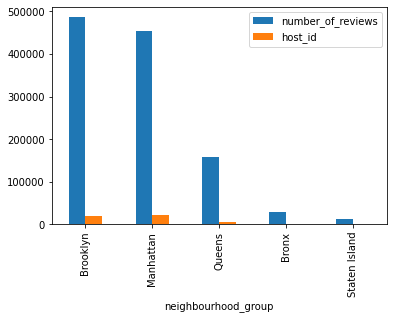

In [113]:
ax = df_group_rev_host.plot.bar(y=['number_of_reviews','host_id'])
plt.show()

In [114]:
#Visualize group by neighbourhood amount of reviews and host inside
df_group_rev_host = df.groupby(['neighbourhood_group'])[['neighbourhood_group','number_of_reviews','host_id','price']].agg({'number_of_reviews':'sum', 'host_id':'count', 'price':'mean'}).sort_values(by=['number_of_reviews','neighbourhood_group'],ascending=False)[0:20]
df_group_rev_host

,number_of_reviews,host_id,price
neighbourhood_group,,,
Brooklyn,486574,20104,124.383207
Manhattan,454569,21661,196.875814
Queens,156950,5666,99.517649
Bronx,28371,1091,87.496792
Staten Island,11541,373,114.812332


In [115]:
#Search relation of feature
matrix = df[['price','number_of_reviews','minimum_nights','reviews_per_month']].corr()
print(matrix)

                      price  number_of_reviews  minimum_nights  \
price              1.000000          -0.047954        0.042799   
number_of_reviews -0.047954           1.000000       -0.080116   
minimum_nights     0.042799          -0.080116        1.000000   
reviews_per_month -0.050564           0.589407       -0.124905   

                   reviews_per_month  
price                      -0.050564  
number_of_reviews           0.589407  
minimum_nights             -0.124905  
reviews_per_month           1.000000  


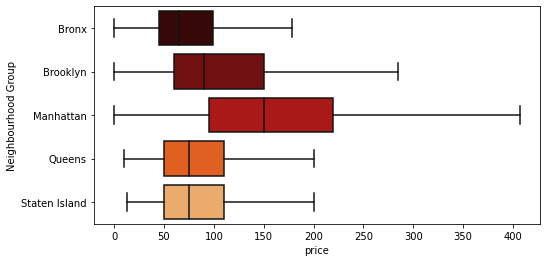

In [116]:
#see relation with location and price
#Checking correlation between neighbourhood_group and price:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df['neighbourhood_group'], x = df['price'], orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Neighbourhood Group') 
plt.show()

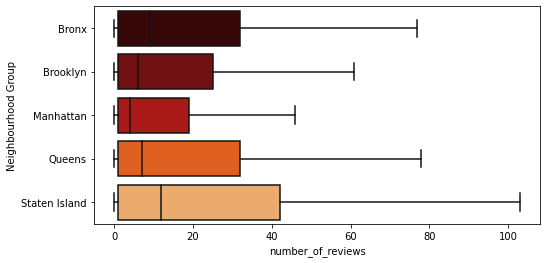

In [117]:
#Checking correlation between neighbourhood_group and number_of_reviews:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df['neighbourhood_group'], x = df['number_of_reviews'], orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Neighbourhood Group') 
plt.show()

Text(0, 0.5, 'Reviews')

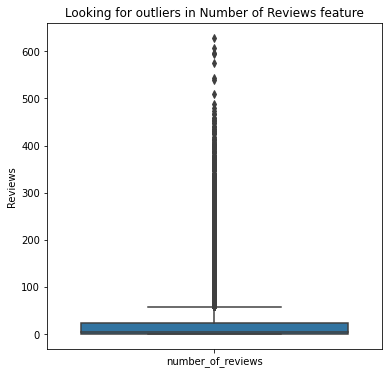

In [118]:
#Let's evaluate our 'Reviews' variable.
plt.figure(figsize=(6,6))
sns.boxplot(data=df[['number_of_reviews']])
plt.title('Looking for outliers in Number of Reviews feature')
plt.ylabel('Reviews')

In [119]:
#row without any review
df_without_rev = df[df['number_of_reviews']<=0]
df_without_rev.shape


(10052, 15)

In [120]:
df_without_rev = df_without_rev.groupby(['neighbourhood_group'])[['neighbourhood_group','host_id','price']].agg({'host_id':'count', 'price':'mean'}).sort_values(by=['neighbourhood_group'],ascending=False)
df_without_rev

,host_id,price
neighbourhood_group,,
Staten Island,59,247.050847
Queens,1092,115.246337
Manhattan,5029,252.514218
Brooklyn,3657,137.580804
Bronx,215,119.860465


In [121]:
#row with 1 or more reviews
df_num_rev = df[df['number_of_reviews']>0]
num_rev_stat = df_num_rev[['number_of_reviews']].describe()

In [122]:
IQR = num_rev_stat['75%']-num_rev_stat['25%']
upper = num_rev_stat['75%'] + 1.5*IQR
lower = num_rev_stat['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

KeyError: '75%'

In [ ]:
num_rev_stat[num_rev_stat['number_of_reviews'] > 550].shape

(5, 15)

Note:More that 6000 is inside this range, not outlider

In [ ]:
#host with price 0 
df[df['price']<=0].shape

(11, 15)

In [ ]:
price_stat = df[['price']].describe()
price_stat

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [ ]:
IQR = price_stat['price']['75%']-price_stat['price']['25%']
upper = price_stat['price']['75%'] + 1.5*IQR
lower = price_stat['price']['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 334.0 and -90.0.


In [ ]:
df_withoucero = df[df['price']>334]
df_withoucero.shape

(2972, 15)

Note: 
- Exists row that have review, and the price is 0.
- Not detected outliders


In [ ]:
# Encoding the 'room_type' column - ['Private room', 'Entire home/apt', 'Shared room']

encode_room = {'Private room':1, 'Entire home/apt':2, 'Shared room':3}
df['room_type_code'].astype(int)
df['room_type_code'] = df['room_type'].map(encode_room)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48895 non-null  object        
 1   host_id                         48895 non-null  int64         
 2   host_name                       48895 non-null  object        
 3   neighbourhood_group             48895 non-null  category      
 4   neighbourhood                   48895 non-null  category      
 5   latitude                        48895 non-null  float64       
 6   longitude                       48895 non-null  float64       
 7   room_type                       48895 non-null  category      
 8   price                           48895 non-null  int64         
 9   minimum_nights                  48895 non-null  int64         
 10  number_of_reviews               48895 non-null  int64         
 

In [ ]:
matrix = df[['price','number_of_reviews','minimum_nights','room_type_code']].corr()
print(matrix)

                      price  number_of_reviews  minimum_nights
price              1.000000          -0.047954        0.042799
number_of_reviews -0.047954           1.000000       -0.080116
minimum_nights     0.042799          -0.080116        1.000000


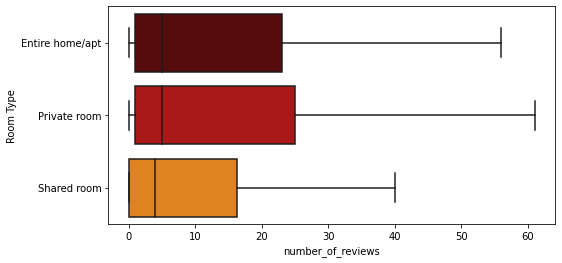

In [ ]:
#Checking correlation between room_type and number_of_reviews:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df['room_type'], x = df['number_of_reviews'], orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Room Type') 
plt.show()

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
df['room_type_code'] = le.fit_transform(df['room_type'])
 
# printing label
df.head()




,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code
id,,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,0.00,1,365,1
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,0
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,0


In [125]:
matrix = df[['price','number_of_reviews','minimum_nights','room_type_code']].corr()
print(matrix)

                      price  number_of_reviews  minimum_nights  room_type_code
price              1.000000          -0.047954        0.042799       -0.249350
number_of_reviews -0.047954           1.000000       -0.080116        0.002724
minimum_nights     0.042799          -0.080116        1.000000       -0.069792
room_type_code    -0.249350           0.002724       -0.069792        1.000000


Note
- romm type negative linear relation

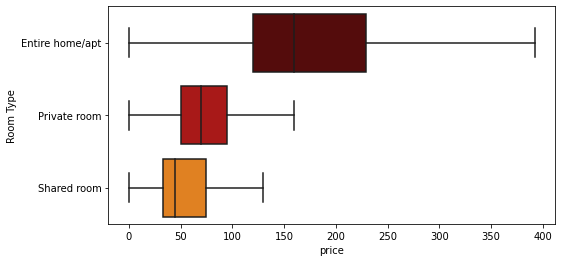

In [126]:
#Checking correlation between room_type and price:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df['room_type'], x = df['price'], orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Room Type') 
plt.show()

In [129]:
df_type = df.groupby(['neighbourhood_group','room_type'])[['neighbourhood_group','room_type','host_id']].agg({'host_id':'count'}).sort_values(by=['neighbourhood_group'],ascending=False)
df_type

host_id
neighbourhood_group room_type               
Staten Island       Entire home/apt      176
                    Private room         188
                    Shared room            9
Queens              Entire home/apt     2096
                    Private room        3372
                    Shared room          198
Manhattan           Entire home/apt    13199
                    Private room        7982
                    Shared room          480
Brooklyn            Entire home/apt     9559
                    Private room       10132
                    Shared room          413
Bronx               Entire home/apt      379
                    Private room         652
                    Shared room           60